In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd

In [3]:
#data = pd.read_csv('/content/drive/My Drive/solar-forecasting/data/meteo_galicia.csv', sep=';', parse_dates=['fecha'], decimal=',',
#                 infer_datetime_format=True, low_memory=False, index_col='fecha').sort_index()

In [4]:
data = pd.read_csv('./data/meteo_galicia.csv', sep=';', parse_dates=['fecha'], decimal=',',
                 infer_datetime_format=True, low_memory=False, index_col='fecha').sort_index()

In [5]:
data

,estacionid,lat,lon,tamb,hum,pres,prec,rad,vvien,tipodered
fecha,,,,,,,,,,
2019-01-01 00:10:00,20284,42.4044,-8.6730,5.4,0,1022.0,0.0,0.0,0.7,OFICIAL
2019-01-01 00:10:00,20233,42.3554,-7.0086,7.3,0,892.1,0.0,0.0,3.5,OFICIAL
2019-01-01 00:10:00,20218,43.1626,-7.2826,9.2,0,955.0,0.0,0.0,0.0,OFICIAL
2019-01-01 00:10:00,20217,42.7071,-7.0471,8.5,0,882.5,0.0,1.0,6.3,OFICIAL
2019-01-01 00:10:00,20221,43.5407,-7.0830,5.3,0,1027.0,0.0,0.0,2.8,OFICIAL
...,...,...,...,...,...,...,...,...,...,...
2019-06-01 19:40:00,20249,42.2987,-7.5907,25.0,0,909.0,0.0,402.0,2.0,OFICIAL
2019-06-01 19:40:00,20259,42.1630,-7.0896,27.0,0,922.0,0.0,374.0,3.0,OFICIAL
2019-06-01 19:40:00,20255,42.4631,-6.9295,30.0,0,NaN,0.0,378.0,0.0,OFICIAL


In [6]:
data = data.drop(columns=['tipodered', 'hum', 'prec', 'vvien', 'pres'])

In [7]:
len(data)

2510008

In [8]:
data.isnull().sum()

estacionid        0
lat               0
lon               0
tamb           2475
rad           10847
dtype: int64

In [9]:
data = data.dropna()

In [10]:
len(data)

2496903

In [11]:
data.isnull().sum()

estacionid    0
lat           0
lon           0
tamb          0
rad           0
dtype: int64

In [12]:
class Scaler:
    def fit(self, data):
        self._min = data.min()
        self._max = data.max()
    
    def normalize(self, data):
        return (data - self._min) / (self._max - self._min)
    
    def denormalize(self, data):
        return data*(self._max-self._min)+self._min

In [13]:
tamb_scaler = Scaler()
tamb_scaler.fit(data['tamb'])
data['tamb'] = tamb_scaler.normalize(data['tamb'])

rad_scaler = Scaler()
rad_scaler.fit(data['rad'])
data['rad'] = rad_scaler.normalize(data['rad'])

In [14]:
data

,estacionid,lat,lon,tamb,rad
fecha,,,,,
2019-01-01 00:10:00,20284,42.4044,-8.6730,0.470423,0.000000
2019-01-01 00:10:00,20233,42.3554,-7.0086,0.497183,0.000000
2019-01-01 00:10:00,20218,43.1626,-7.2826,0.523944,0.000000
2019-01-01 00:10:00,20217,42.7071,-7.0471,0.514085,0.000791
2019-01-01 00:10:00,20221,43.5407,-7.0830,0.469014,0.000000
...,...,...,...,...,...
2019-06-01 19:40:00,20249,42.2987,-7.5907,0.746479,0.317787
2019-06-01 19:40:00,20259,42.1630,-7.0896,0.774648,0.295652
2019-06-01 19:40:00,20255,42.4631,-6.9295,0.816901,0.298814


In [15]:
estaciones = [s for s in set(data['estacionid'])]

In [16]:
len(estaciones)

142

In [17]:
%%time
data_by_station = []

for s in estaciones:
    filter_station = data['estacionid'] == s
    data_station = data[filter_station].drop(columns=['estacionid'])
    d = data_station.describe()
    if d.rad['max'] != 0:
        data_by_station.append(data_station)

CPU times: user 2.54 s, sys: 0 ns, total: 2.54 s
Wall time: 2.55 s


In [18]:
len(data_by_station)

111

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (16, 6)})

In [20]:
data_by_station[0]

,lat,lon,tamb,rad
fecha,,,,
2019-01-01 01:00:00,43.3634,-8.4419,0.557746,0.000000
2019-01-01 01:10:00,43.3634,-8.4419,0.547887,0.000000
2019-01-01 01:30:00,43.3634,-8.4419,0.539437,0.000000
2019-01-01 01:40:00,43.3634,-8.4419,0.535211,0.000000
2019-01-01 02:00:00,43.3634,-8.4419,0.538028,0.000000
...,...,...,...,...
2019-06-01 18:30:00,43.3634,-8.4419,0.774648,0.456917
2019-06-01 18:40:00,43.3634,-8.4419,0.760563,0.430040
2019-06-01 19:00:00,43.3634,-8.4419,0.760563,0.372332


In [21]:
%%time
data_by_station = [s.resample('1H').mean().ffill().bfill() for s in data_by_station]

CPU times: user 290 ms, sys: 0 ns, total: 290 ms
Wall time: 291 ms


In [22]:
data_by_station[0]

,lat,lon,tamb,rad
fecha,,,,
2019-01-01 01:00:00,43.3634,-8.4419,0.545070,0.000000
2019-01-01 02:00:00,43.3634,-8.4419,0.540141,0.000000
2019-01-01 03:00:00,43.3634,-8.4419,0.532394,0.000000
2019-01-01 04:00:00,43.3634,-8.4419,0.551056,0.000000
2019-01-01 05:00:00,43.3634,-8.4419,0.558803,0.000000
...,...,...,...,...
2019-06-01 15:00:00,43.3634,-8.4419,0.714789,0.672727
2019-06-01 16:00:00,43.3634,-8.4419,0.711268,0.632806
2019-06-01 17:00:00,43.3634,-8.4419,0.742958,0.548419


In [23]:
for d in data_by_station:
    d['day']=[x.day for x in d.index]
    d['month']=[x.month for x in d.index]
    d['hour']=[x.hour for x in d.index]

In [24]:
data_by_station[0]

,lat,lon,tamb,rad,day,month,hour
fecha,,,,,,,
2019-01-01 01:00:00,43.3634,-8.4419,0.545070,0.000000,1,1,1
2019-01-01 02:00:00,43.3634,-8.4419,0.540141,0.000000,1,1,2
2019-01-01 03:00:00,43.3634,-8.4419,0.532394,0.000000,1,1,3
2019-01-01 04:00:00,43.3634,-8.4419,0.551056,0.000000,1,1,4
2019-01-01 05:00:00,43.3634,-8.4419,0.558803,0.000000,1,1,5
...,...,...,...,...,...,...,...
2019-06-01 15:00:00,43.3634,-8.4419,0.714789,0.672727,1,6,15
2019-06-01 16:00:00,43.3634,-8.4419,0.711268,0.632806,1,6,16
2019-06-01 17:00:00,43.3634,-8.4419,0.742958,0.548419,1,6,17


In [25]:
import numpy as np
import tensorflow as tf

np.random.seed(1)
tf.random.set_seed(1)

In [26]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

def get_rnn_dataset(data, past_history=10, forecast_horizon=1):
    n_vars = data.shape[1]
    values = series_to_supervised(data, past_history, forecast_horizon).values
    train_X, train_y = values[:, :-1*n_vars*forecast_horizon], values[:, n_vars*past_history+2::n_vars]
    
    return train_X, train_y

In [27]:
past_history = 23
forecast_horizon = 1

In [28]:
%%time
data_by_station_series = [series_to_supervised(d, past_history, forecast_horizon) for d in data_by_station]

CPU times: user 2.61 s, sys: 112 ms, total: 2.73 s
Wall time: 2.74 s


In [29]:
data_by_station_series[0]

,var1(t-23),var2(t-23),var3(t-23),var4(t-23),var5(t-23),var6(t-23),var7(t-23),var1(t-22),var2(t-22),var3(t-22),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
fecha,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,43.3634,-8.4419,0.545070,0.000000,1.0,1.0,1.0,43.3634,-8.4419,0.540141,...,1.0,1.0,23.0,43.3634,-8.4419,0.514789,0.000000,2,1,0
2019-01-02 01:00:00,43.3634,-8.4419,0.540141,0.000000,1.0,1.0,2.0,43.3634,-8.4419,0.532394,...,2.0,1.0,0.0,43.3634,-8.4419,0.503873,0.000000,2,1,1
2019-01-02 02:00:00,43.3634,-8.4419,0.532394,0.000000,1.0,1.0,3.0,43.3634,-8.4419,0.551056,...,2.0,1.0,1.0,43.3634,-8.4419,0.496479,0.000000,2,1,2
2019-01-02 03:00:00,43.3634,-8.4419,0.551056,0.000000,1.0,1.0,4.0,43.3634,-8.4419,0.558803,...,2.0,1.0,2.0,43.3634,-8.4419,0.493662,0.000000,2,1,3
2019-01-02 04:00:00,43.3634,-8.4419,0.558803,0.000000,1.0,1.0,5.0,43.3634,-8.4419,0.559859,...,2.0,1.0,3.0,43.3634,-8.4419,0.497887,0.000000,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 15:00:00,43.3634,-8.4419,0.788732,0.631621,31.0,5.0,16.0,43.3634,-8.4419,0.788732,...,1.0,6.0,14.0,43.3634,-8.4419,0.714789,0.672727,1,6,15
2019-06-01 16:00:00,43.3634,-8.4419,0.788732,0.544466,31.0,5.0,17.0,43.3634,-8.4419,0.781690,...,1.0,6.0,15.0,43.3634,-8.4419,0.711268,0.632806,1,6,16
2019-06-01 17:00:00,43.3634,-8.4419,0.781690,0.447826,31.0,5.0,18.0,43.3634,-8.4419,0.760563,...,1.0,6.0,16.0,43.3634,-8.4419,0.742958,0.548419,1,6,17


In [30]:
in_vars = []

for v in [1, 2, 3, 5, 6, 7]:
    for i in range(past_history, 0, -1):
        in_vars.append(('var%d(t-%d)' % (v,i)))


rad_var = []

for i in range(past_history, 0, -1):
    rad_var.append(('var4(t-%d)' % i))
        
day_var = []

for i in range(past_history, 0, -1):
    day_var.append(('var5(t-%d)' % i))
        
month_var = []

for i in range(past_history, 0, -1):
    month_var.append(('var6(t-%d)' % i))

target_var = []

for i in range(0, forecast_horizon):
    if i == 0:
        target_var.append('var4(t)')
    else:
        target_var.append(('var4(t+%d)' % i))

#### CONCAT

In [31]:
data_all = pd.concat(data_by_station_series)

data_all

,var1(t-23),var2(t-23),var3(t-23),var4(t-23),var5(t-23),var6(t-23),var7(t-23),var1(t-22),var2(t-22),var3(t-22),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
fecha,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,43.3634,-8.4419,0.545070,0.000000,1.0,1.0,1.0,43.3634,-8.4419,0.540141,...,1.0,1.0,23.0,43.3634,-8.4419,0.514789,0.000000,2,1,0
2019-01-02 01:00:00,43.3634,-8.4419,0.540141,0.000000,1.0,1.0,2.0,43.3634,-8.4419,0.532394,...,2.0,1.0,0.0,43.3634,-8.4419,0.503873,0.000000,2,1,1
2019-01-02 02:00:00,43.3634,-8.4419,0.532394,0.000000,1.0,1.0,3.0,43.3634,-8.4419,0.551056,...,2.0,1.0,1.0,43.3634,-8.4419,0.496479,0.000000,2,1,2
2019-01-02 03:00:00,43.3634,-8.4419,0.551056,0.000000,1.0,1.0,4.0,43.3634,-8.4419,0.558803,...,2.0,1.0,2.0,43.3634,-8.4419,0.493662,0.000000,2,1,3
2019-01-02 04:00:00,43.3634,-8.4419,0.558803,0.000000,1.0,1.0,5.0,43.3634,-8.4419,0.559859,...,2.0,1.0,3.0,43.3634,-8.4419,0.497887,0.000000,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 15:00:00,42.5801,-8.8047,0.774648,0.741502,31.0,5.0,16.0,42.5801,-8.8047,0.760563,...,1.0,6.0,14.0,42.5801,-8.8047,0.732394,0.785244,1,6,15
2019-06-01 16:00:00,42.5801,-8.8047,0.760563,0.624638,31.0,5.0,17.0,42.5801,-8.8047,0.762911,...,1.0,6.0,15.0,42.5801,-8.8047,0.739437,0.731752,1,6,16
2019-06-01 17:00:00,42.5801,-8.8047,0.762911,0.495652,31.0,5.0,18.0,42.5801,-8.8047,0.755869,...,1.0,6.0,16.0,42.5801,-8.8047,0.744131,0.636100,1,6,17


In [32]:
len(data_all)

401446

In [33]:
data_all.isnull().sum()

var1(t-23)    0
var2(t-23)    0
var3(t-23)    0
var4(t-23)    0
var5(t-23)    0
             ..
var3(t)       0
var4(t)       0
var5(t)       0
var6(t)       0
var7(t)       0
Length: 168, dtype: int64

In [34]:
data_input = data_all[in_vars]
data_input.columns

Index(['var1(t-23)', 'var1(t-22)', 'var1(t-21)', 'var1(t-20)', 'var1(t-19)',
       'var1(t-18)', 'var1(t-17)', 'var1(t-16)', 'var1(t-15)', 'var1(t-14)',
       ...
       'var7(t-10)', 'var7(t-9)', 'var7(t-8)', 'var7(t-7)', 'var7(t-6)',
       'var7(t-5)', 'var7(t-4)', 'var7(t-3)', 'var7(t-2)', 'var7(t-1)'],
      dtype='object', length=138)

In [35]:
data_target = data_all[target_var]
data_target.columns

Index(['var4(t)'], dtype='object')

In [36]:
data_input = data_input.values
data_input = data_input.reshape((data_input.shape[0], 1, data_input.shape[1]))
data_input.shape

(401446, 1, 138)

In [37]:
data_target = data_target.values
data_target.shape

(401446, 1)

### MODELO

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
%%time
X_train, X_test, y_train, y_test = train_test_split(data_input, data_target, train_size=0.8)

CPU times: user 621 ms, sys: 62.7 ms, total: 684 ms
Wall time: 685 ms


In [40]:
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import mae
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
earlyStopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

In [42]:
def rad_mae(x, y):
    X = rad_scaler.denormalize(x)
    Y = rad_scaler.denormalize(y)
    
    return mae(X, Y)

In [43]:
model = Sequential([
    Dense(500, input_shape=(1, X_train.shape[2]), activation='sigmoid'),
    Flatten(),
    Dense(100, activation='sigmoid'),
    Dense(forecast_horizon, activation='sigmoid')
])

model.compile(loss='mae', optimizer='adam', metrics=[rad_mae])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 500)            69500     
_________________________________________________________________
flatten (Flatten)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 119,701
Trainable params: 119,701
Non-trainable params: 0
_________________________________________________________________


In [44]:
%%time
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=256, callbacks=[earlyStopping], verbose=0)

CPU times: user 11min 2s, sys: 7min 28s, total: 18min 30s
Wall time: 5min 9s


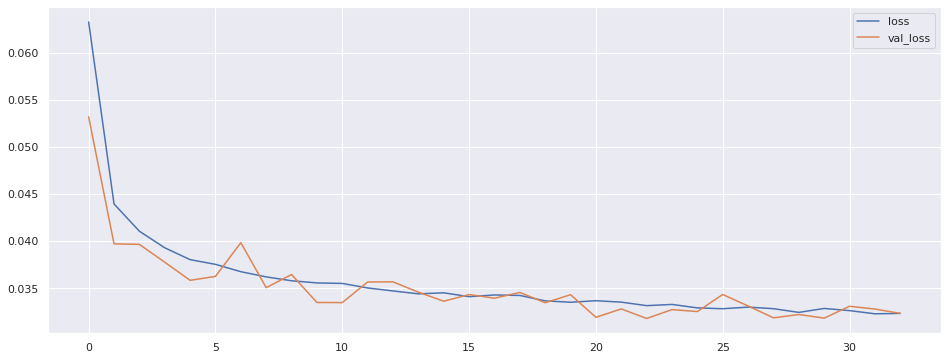

In [45]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [46]:
%%time
model.evaluate(X_test, y_test)

2510/2510 [==============================] - 7s 3ms/step - loss: 0.0317 - rad_mae: 40.0919


[0.031693171709775925, 40.091888427734375]

In [47]:
%%time
y_predicted = model.predict(X_test)

In [48]:
YP = rad_scaler.denormalize(y_predicted)
YT = rad_scaler.denormalize(y_test)

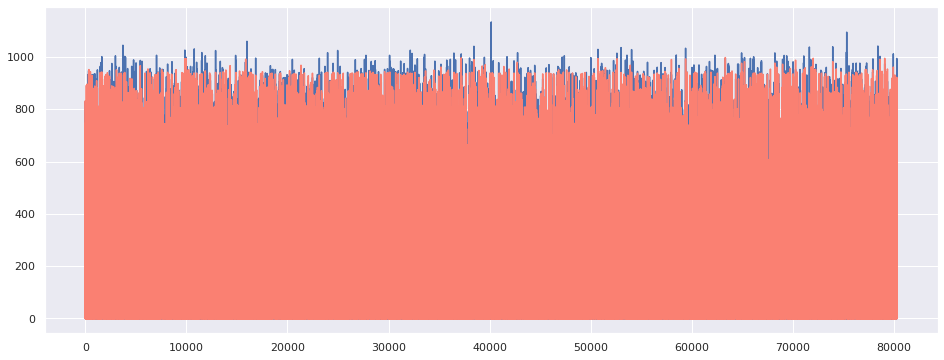

In [49]:
plt.plot(YT)
plt.plot(YP, color='salmon')
plt.show()

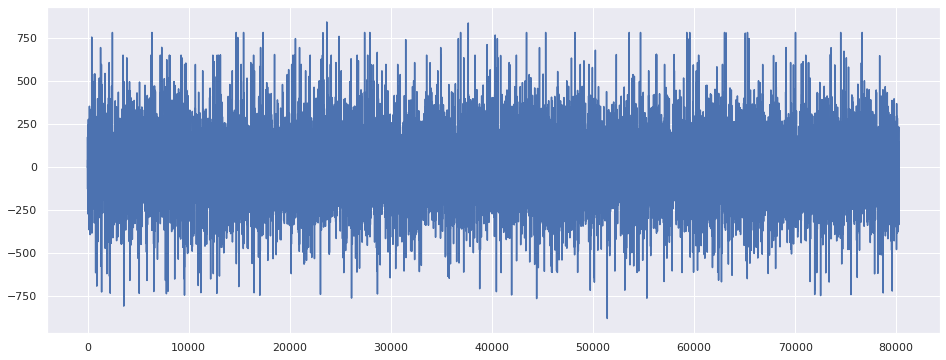

In [50]:
error = YT - YP
plt.plot(error)
plt.show()